# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url
#url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "Imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?units={temp_units}&APPID={weather_api_key}&q="

In [4]:
#response = requests.get(query_url).json()
#print(json.dumps(response, indent=4, sort_keys=True))

In [5]:
#set lists
city_two = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities
count_one = 0
set_one = 1

# loop for dataframe 
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | mahina
Processing Record 11 of Set 1 | andapa
Processing Record 12 of Set 1 | alekseyevsk
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | belaya rechka
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | egvekinot
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | belgrade
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | aldergrove
Processing Record 23 of Set 1 | bluff
Processing Record 24 of Set 1 | hermanus
Processing Record

Processing Record 35 of Set 4 | inirida
Processing Record 36 of Set 4 | dongkan
Processing Record 37 of Set 4 | chadan
Processing Record 38 of Set 4 | barreirinhas
City not found. Skipping...
Processing Record 39 of Set 4 | berbera
Processing Record 40 of Set 4 | hastings
Processing Record 41 of Set 4 | airai
Processing Record 42 of Set 4 | palauig
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | ushibuka
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | sompeta
Processing Record 47 of Set 4 | cacador
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | kavaratti
Processing Record 50 of Set 4 | benicarlo
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | iracoubo
Processing Record 3 of Set 5 | manaus
Processing Record 4 of Set 5 | namatanai
Processing Record 5 of Set 5 | fort nelson
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | tr

Processing Record 24 of Set 8 | crab hill
Processing Record 25 of Set 8 | menongue
Processing Record 26 of Set 8 | malakal
City not found. Skipping...
Processing Record 27 of Set 8 | mecca
Processing Record 28 of Set 8 | kindu
Processing Record 29 of Set 8 | lalibela
Processing Record 30 of Set 8 | lavrentiya
Processing Record 31 of Set 8 | mabaruma
Processing Record 32 of Set 8 | ust-ilimsk
Processing Record 33 of Set 8 | boshnyakovo
City not found. Skipping...
Processing Record 34 of Set 8 | solwezi
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | north bend
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 8 | susanville
Processing Record 38 of Set 8 | kholm-zhirkovskiy
Processing Record 39 of Set 8 | quime
Processing Record 40 of Set 8 | nanortalik
Processing Record 41 of Set 8 | porto santo
City not found. Skipping...
Processing Record 42 of Set 8 | taonan
Processing Record 43 of Set 8 | korla
Proces

Processing Record 4 of Set 12 | mabama
Processing Record 5 of Set 12 | sergiyevsk
Processing Record 6 of Set 12 | baykit
Processing Record 7 of Set 12 | maba
Processing Record 8 of Set 12 | beatrice
Processing Record 9 of Set 12 | pasni
Processing Record 10 of Set 12 | tanout
Processing Record 11 of Set 12 | jalu
Processing Record 12 of Set 12 | zharkent
Processing Record 13 of Set 12 | bubaque
Processing Record 14 of Set 12 | pacific grove
City not found. Skipping...
Processing Record 15 of Set 12 | havoysund
Processing Record 16 of Set 12 | tsiroanomandidy
Processing Record 17 of Set 12 | mazagao
Processing Record 18 of Set 12 | nha trang
Processing Record 19 of Set 12 | linxia
Processing Record 20 of Set 12 | chumikan
City not found. Skipping...
Processing Record 21 of Set 12 | indramayu
Processing Record 22 of Set 12 | bonfim
Processing Record 23 of Set 12 | weimar
Processing Record 24 of Set 12 | aksay
Processing Record 25 of Set 12 | pennathur
Processing Record 26 of Set 12 | soy

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dictionary = {
    "City": city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,
}

weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.77,114.60,64.40,68,0,5.82,AU,1603326269
1,nikolskoye,59.70,30.79,39.20,93,90,8.95,RU,1603326231
2,east london,65.00,-15.00,23.00,92,20,4.70,IS,1603326205
3,yellowknife,62.46,-114.35,24.80,73,90,18.34,CA,1603326010
4,tiksi,71.69,128.87,10.53,94,100,5.19,RU,1603326080


In [8]:
weather_df.to_csv(output_data_file)

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,21.769948,20.697331,60.060884,75.564991,52.487002,7.080589,1.603326e+09
std,31.765624,85.529852,19.854805,19.774063,38.289607,4.721317,1.312610e+02
min,-54.800000,-179.170000,-4.000000,8.000000,0.000000,0.090000,1.603326e+09
25%,-5.070000,-50.210000,46.990000,68.000000,11.000000,3.360000,1.603326e+09
50%,25.520000,24.660000,64.400000,79.000000,61.000000,5.990000,1.603326e+09
75%,48.030000,88.400000,77.000000,90.000000,90.000000,9.370000,1.603326e+09
max,78.220000,178.420000,91.400000,100.000000,100.000000,27.360000,1.603326e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#print out any cities with humidity over 100, store in new DF. use loc funtion to look. we might not find anything with 
#humidity over 100, but if you do, exclude from data set
humidity_errors = weather_df.loc[weather_df["Humidity"] > 100]
humidity_errors
#print(weather_df[weather_df['Humidity']> 100])

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#  Get the indices of cities that have humidity over 100%.
#none exist 

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#no cities exist with humidity over 100. skipping this step as the df is already clean

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

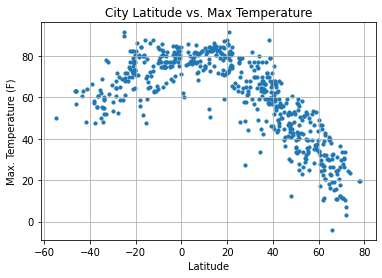

In [13]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_temperature_plot.png")

#show
plt.show()

## Latitude vs. Humidity Plot

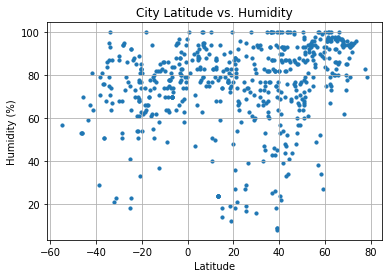

In [14]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_humidity_plot.png")

#show
plt.show()

## Latitude vs. Cloudiness Plot

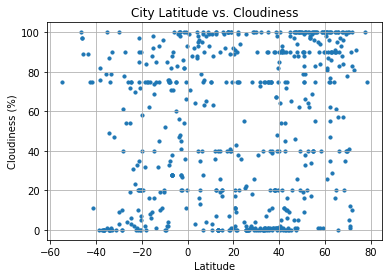

In [15]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_cloudiness_plot.png")

#show
plt.show()

## Latitude vs. Wind Speed Plot

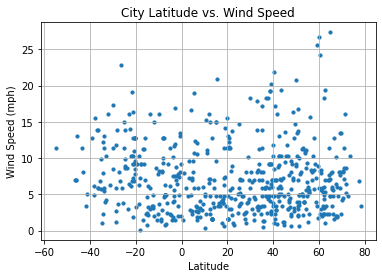

In [16]:
#scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save
plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

## Linear Regression

In [18]:
north_latitude = weather_df[weather_df['Lat'] >= 0]

south_latitude = weather_df[weather_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
north_latitude.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,nikolskoye,59.70,30.79,39.20,93,90,8.95,RU,1603326231
2,east london,65.00,-15.00,23.00,92,20,4.70,IS,1603326205
3,yellowknife,62.46,-114.35,24.80,73,90,18.34,CA,1603326010
4,tiksi,71.69,128.87,10.53,94,100,5.19,RU,1603326080
6,kodiak,57.79,-152.41,46.40,52,1,12.75,US,1603326208


The r-squared is: 0.7657366320095803


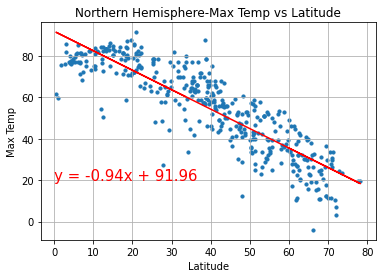

In [20]:
#scatter plot & linear regression
latitude = north_latitude["Lat"]
max_temp = north_latitude["Max Temp"]
x = latitude
y = max_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,max_temp)[0],2)

plt.scatter(x, y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title("Northern Hemisphere-Max Temp vs Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4131097263016886


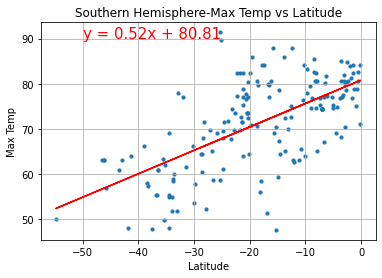

In [21]:
#scatter plot & linear regression
latitude = south_latitude["Lat"]
max_temp = south_latitude["Max Temp"]

x = latitude
y = max_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,max_temp)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title("Southern Hemisphere-Max Temp vs Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06164822121290836


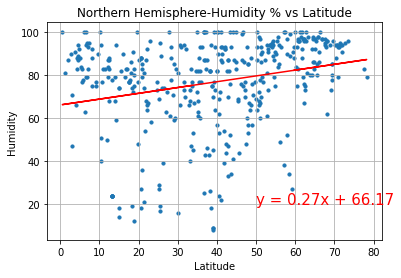

In [23]:
#scatter plot & linear regression
latitude = north_latitude["Lat"]
humidity = north_latitude["Humidity"]

x = latitude
y = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,humidity)[0],2)

plt.scatter(x, y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title("Northern Hemisphere-Humidity % vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06300164072904259


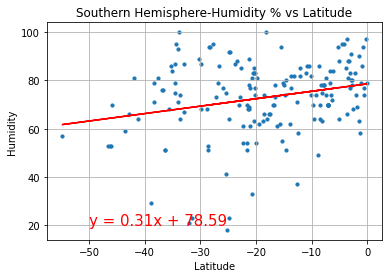

In [24]:
#scatter plot & linear regression
latitude = south_latitude["Lat"]
humidity = south_latitude["Humidity"]

x = latitude
y = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,humidity)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere-Humidity % vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03866599222173813


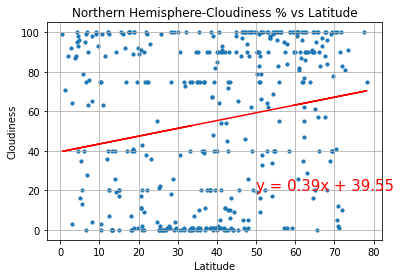

In [25]:
#scatter plot & linear regression
latitude = north_latitude["Lat"]
cloudiness = north_latitude["Cloudiness"]

x = latitude
y = cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,cloudiness)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title("Northern Hemisphere-Cloudiness % vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013220008570269882


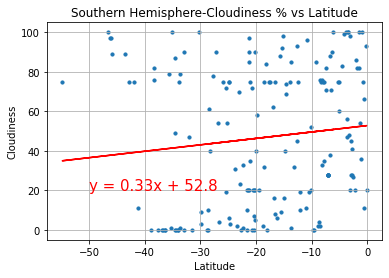

In [26]:
#scatter plot & linear regression
latitude = south_latitude["Lat"]
cloudiness = south_latitude["Cloudiness"]

x = latitude
y = cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,cloudiness)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere-Cloudiness % vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004903516829730943


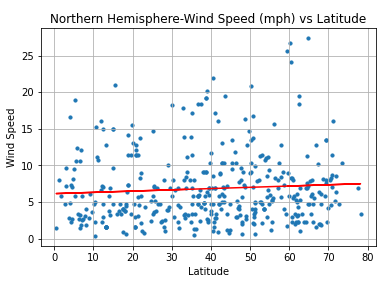

In [27]:
#scatter plot & linear regression
latitude = north_latitude["Lat"]
wind_speed = north_latitude["Wind Speed"]

x = latitude
y = wind_speed

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,wind_speed)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title("Northern Hemisphere-Wind Speed (mph) vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04493803742734161


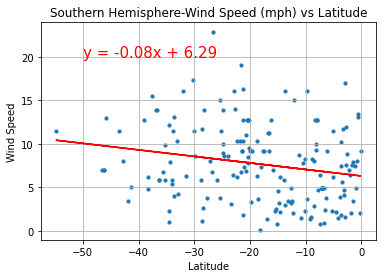

In [28]:
#scatter plot & linear regression
latitude = south_latitude["Lat"]
wind_speed = south_latitude["Wind Speed"]

x = latitude
y = wind_speed

(slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(latitude,wind_speed)[0],2)

plt.scatter(x,y, marker="o", s=10)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere-Wind Speed (mph) vs Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

print(f"The r-squared is: {rvalue**2}")

#save
#plt.savefig("output_plots/latitude_windspeed_plot.png")

#show
plt.show()